The RetroTide repository consists of two key packages - `bcs` and `retrotide`. The `bcs` package comprises key PKS domains (e.g. AT, DH, ER, KR) and their corresponding reaction rules, written as SMARTS templates with RDKit. These domains can then be concatenated together to form modules, which can in turn be concatenated together to form a chimeric type I PKS. Meanwhile, `retrotide` calls upon `bcs` to combinatorially explore the design space of chimeric type I PKSs with the objective of synthesizing a target molecule, or at least, its required carbon scaffold.

The introduction presented here is specifically for `bcs` rather than `retrotide`. Consequently, in building various PKS designs here, we specify the various starter and extender units as well as the domain architectures within a module. When using `retrotide`, however, we only need to provide a target molecule as the input, after which `retrotide` will recursively decide on the optimal choice of starters, extenders, and domain architectures to use in order to automatically design chimeric PKSs that produce molecules which are chemically similar to the specified target.

In [28]:
from retrotide import retrotide, structureDB

In [29]:
import bcs

We can instantiate various type I PKS domains using any of the following domain classes from the `bcs` package: `bcs.AT` (acyltransferase), `bcs.KR` (ketoreductase), `bcs.DH` (dehydratase), `bcs.ER` (enoylreductase), and `bcs.TE` (thioesterase). For each module, the ketosynthase and acyl-carrier protein domains are assumed to be implicitly present.

#### Creating a loading module

In order to create a loading module, we only need a `bcs.AT` domain. We also need to specify which `substrate` is being used and if this is module is a loading module or not (by setting `loading = True` or `loading = False`. The full list of starter units that can be used within a loading module can be found in `../bcs/data/starters.smi`). 

Once a `bcs.AT` domain object has been instantiated, we can create a loading module by passing this `bcs.AT` domain as an argument into the `bcs.Module` class to instantiate an object of the `bcs.Module` class.

In [3]:
### Build a loading module with acetyl-CoA
AT_domain_with_acetyl_coa = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_acetyl_coa}, loading = True)

With this loading module, we can now instantiate an object of the `bcs.Cluster` class. The `bcs.Cluster` class takes in a list of modules as its input so while we are only building a PKS with a loading module here, we will add more extension modules later on and these can also be passed in within the input list of modules to build bigger and bigger PKSs.

In [4]:
cluster = bcs.Cluster(modules = [loading_module])

Finally, we can visualize the product from this PKS cluster with a loading module that loads Acetyl-CoA as its starter unit by calling on the `.computeProduct` method for the `bcs.Cluster` class. This `.computeProduct` returns an RDKit `Chem.rdchem.Mol` object.

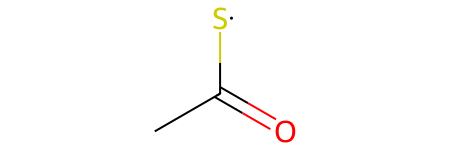

In [5]:
mol = cluster.computeProduct(structureDB)
mol

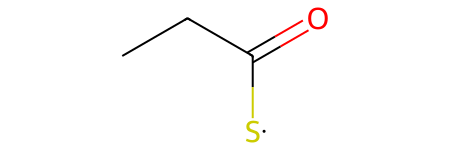

In [6]:
### Build a loading module with propionyl-CoA
AT_domain_with_propionyl_coa = bcs.AT(active = True, substrate = "prop")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_propionyl_coa}, loading = True)
cluster = bcs.Cluster(modules = [loading_module])
mol = cluster.computeProduct(structureDB)
mol

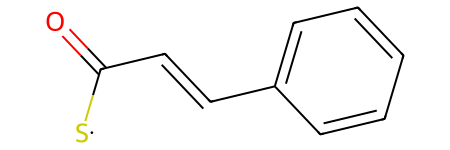

In [7]:
### Build a loading module with cinnamoyl-CoA
AT_domain_with_cinnamoyl_coa = bcs.AT(active = True, substrate = "cin")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_cinnamoyl_coa}, loading = True)
cluster = bcs.Cluster(modules = [loading_module])
mol = cluster.computeProduct(structureDB)
mol

Notice that for the products of each of the loading modules above, there is a sulfur radical attached to the carbonyl carbon atom. This sulfur radical is merely a placeholder that represents the bond to the acyl-carrier protein (ACP) in each module. The `bcs` package also has termination domains that we can run to offload the attached substrate and finally, release the PKS product.

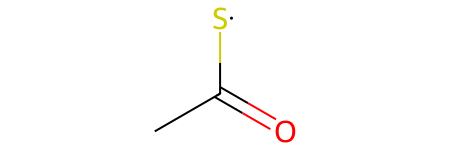

In [8]:
### Build a loading module with malonyl-CoA
AT_domain_with_malonyl_coa = bcs.AT(active = True, substrate = "Malonyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_malonyl_coa}, loading = True)
cluster = bcs.Cluster(modules = [loading_module])
mol = cluster.computeProduct(structureDB)
mol

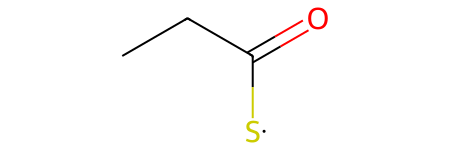

In [9]:
### Build a loading module with methylmalonyl-CoA
AT_domain_with_methylmalonyl_coa = bcs.AT(active = True, substrate = "Methylmalonyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_methylmalonyl_coa}, loading = True)
cluster = bcs.Cluster(modules = [loading_module])
mol = cluster.computeProduct(structureDB)
mol

#### Adding the first extension module to a loading module

Now that we have explored how to build the loading modules with the various starter units available, let's add extension modules onto these loading modules to ultimately build the elongated carbon scaffolds that type I PKSs are so well known for.

We begin by defining a loading module that uses Acetyl-CoA as the starting unit:

In [10]:
AT_domain_with_acetyl_coa = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_acetyl_coa}, loading = True)

To add the first extension module onto this loading module, let's use malonyl-CoA as an extension unit. Malonyl-CoA will add two carbons onto the previously loaded acetyl-CoA, and we can ultimately expect the final product to exhibit a four carbon backbone. For the domain architecture, let's begin with just KS-AT-ACP, i.e. ketosynthase - acyltransferase - acyl-carrier protein. Since the KS and ACP domains are implicitly featurized in `bcs`, we only need to specify the AT domain for the first extension module:

In [11]:
### Create Module 1 with just a ketoreductase
AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA") # Malonyl-CoA is used as an extension unit
module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1}, loading = False)

Now, when creating an object of the `bcs.Cluster` class, we pass the list of modules `[loading_module, module1]`) as an argument and then call upon `structureDB` to ultimately visualize the PKS product:

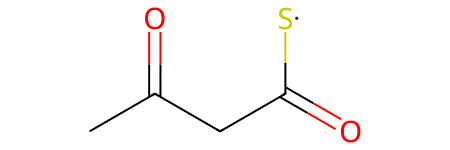

In [12]:
cluster = bcs.Cluster(modules = [loading_module, module1])
cluster.computeProduct(structureDB)

This product now comprises 4 carbon atoms, as anticipated, and neither carbonyl carbon has been reduced since the first extension module did not contain any additional processing domain types, such as ketoreductases (KR), dehydratases (DH), or enoylreductases (ER). To understand the effect of each of these additional processing, let's gradually incorporate them into the first extension module:

Since malonyl-CoA added a ketone group to the previously loaded acetyl-CoA substrate, the first domain that can be included within the first extension module would naturally be a ketoreductase (KR) domain. KR domains can be of many subtypes: `B1`, `B`, `C1`, `A1`, `A2`, `A`, `B1`, `B2`, `B`, `C1`, `C2`, and `U`. Each of these KR subtypes largely work the same way, i.e., by reducing the ketone group to an alcohol, but differ ony in terms of the stereochemistry of the alcohol group formed. If we care only about the 2D structure of a PKS product, however, then the specific subtype of KR domain used doesn't really matter. 

In [13]:
### Create a loading module with acetyl-CoA
AT_domain_with_acetyl_coa = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_acetyl_coa}, loading = True)

### Create an extension module with malonyl-CoA and a KR domain
AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA") # Malonyl-CoA is used as an extension unit
KR_domain_mod1 = bcs.KR(active = True, type = "B")
module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1,
                                bcs.KR: KR_domain_mod1}, loading = False)

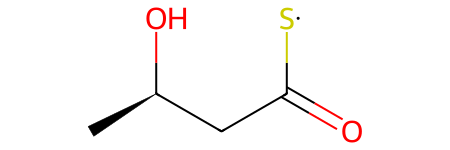

In [14]:
cluster = bcs.Cluster(modules = [loading_module, module1])
cluster.computeProduct(structureDB)

Thus far, our first extension module comprises the KS-AT-KR-ACP domain architecture. Recall that within the `bcs` package, the `KS` and `ACP` domains within each module are always implicitly defined. This is why, in defining the first extension module above (`module1`), only the AT (`bcs.AT`) and KR (`bcs.KR`) domains have been explicitly passed in as input arguments for the `domains` parameter of the `bcs.Module` class:

`module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1, bcs.KR: KR_domain_mod1}, loading = False)`

Let's now expand this domain architecture within module 1 to KS-AT-KR-DH-ACP and observe what the resulting product would look like. The dehydratase (DH) domain will perform an elimination reaction and create an alkene bond, so we should expect to see an alkene in the final PKS product. Depending on the stereochemistry of the alcohol group created via the KR domain, the E/Z stereochemistry of the double-bond created by the DH domain is usually affected accordingly but for now, let's focus only on the 2D structures:

In [15]:
### Create a loading module with acetyl-CoA
AT_domain_with_acetyl_coa = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_acetyl_coa}, loading = True)

### Create an extension module with malonyl-CoA and KR as well as DH domains
AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA") # Malonyl-CoA is used as an extension unit
KR_domain_mod1 = bcs.KR(active = True, type = "B")
DH_domain_mod1 = bcs.DH(active = True)
module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1,
                                bcs.KR: KR_domain_mod1,
                                bcs.DH: DH_domain_mod1,
                                }, loading = False)

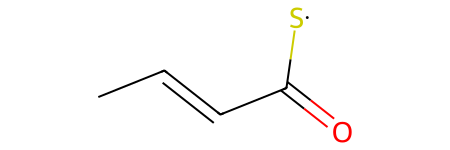

In [16]:
cluster = bcs.Cluster(modules = [loading_module, module1])
cluster.computeProduct(structureDB)

Finally, let's add in the enoylreductase (ER) domain into our first extension module to create a fully-reducing DH-ER-KR loop. We call this domain architecture fully-reducing because the ER domain will reduce the alkene group completely to generate sp3 hybridized carbons.

**Note that when creating the dictionary of domains within a module, AT always comes first, followed by KR, then DH, and finally, ER. This order must always be preserved.**

In [17]:
### Create a loading module with acetyl-CoA
AT_domain_with_acetyl_coa = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_acetyl_coa}, loading = True)

### Create an extension module with malonyl-CoA and a KR domain
AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA") # Malonyl-CoA is used as an extension unit
KR_domain_mod1 = bcs.KR(active = True, type = "B")
DH_domain_mod1 = bcs.DH(active = True)
ER_domain_mod1 = bcs.ER(active = True)

module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1,
                                bcs.KR: KR_domain_mod1,
                                bcs.DH: DH_domain_mod1,
                                bcs.ER: ER_domain_mod1}, loading = False)

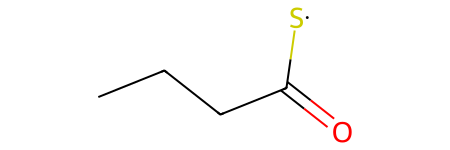

In [18]:
cluster = bcs.Cluster(modules = [loading_module, module1])
cluster.computeProduct(structureDB)

#### Adding multiple extension modules to a loading module for the biosynthesis of cryptofolione

Now that we have added a single extension module to a loading module and have observed the chain elongation properties of PKSs, let's use the `bcs` package to design a PKS that can synthesize the complex natural product cryptofolione. The full design for this PKS has been shown in our Biosynth Pipeline paper as well: https://www.biorxiv.org/content/10.1101/2024.11.04.621673v1.abstract

In [19]:
### Create a loading module with cinnamoyl-CoA
AT_domain_with_cinnamoyl_CoA = bcs.AT(active = True, substrate = "cin")

loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_cinnamoyl_CoA}, 
                            loading = True)

### first extension module with malonyl-CoA and a KR domain
AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA") 
KR_domain_mod1 = bcs.KR(active = True, type = "B")

module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1,
                                bcs.KR: KR_domain_mod1}, loading = False)

### second extension module with malonyl-CoA and a KR domain
AT_domain_mod2 = bcs.AT(active = True, substrate = "Malonyl-CoA") 
KR_domain_mod2 = bcs.KR(active = True, type = "B")

module2 = bcs.Module(domains = {bcs.AT: AT_domain_mod2,
                                bcs.KR: KR_domain_mod2}, loading = False)

### third extension module with malonyl-CoA and DH, KR domains
AT_domain_mod3 = bcs.AT(active = True, substrate = "Malonyl-CoA")
KR_domain_mod3 = bcs.KR(active = True, type = "B")
DH_domain_mod3 = bcs.DH(active = True)

module3 = bcs.Module(domains = {bcs.AT: AT_domain_mod3,
                                bcs.KR: KR_domain_mod3,
                                bcs.DH: DH_domain_mod3,}, loading = False)

### fourth extension module with malonyl-CoA and a KR domain
AT_domain_mod4 = bcs.AT(active = True, substrate = "Malonyl-CoA")
KR_domain_mod4 = bcs.KR(active = True, type = "B")

module4 = bcs.Module(domains = {bcs.AT: AT_domain_mod4,
                                bcs.KR: KR_domain_mod4}, loading = False)

### fifth and final extension module with malonyl-CoA and KR, DH domains
AT_domain_mod5 = bcs.AT(active = True, substrate = "Malonyl-CoA")
KR_domain_mod5 = bcs.KR(active = True, type = "B")
DH_domain_mod5 = bcs.DH(active = True)

module5 = bcs.Module(domains = {bcs.AT: AT_domain_mod5,
                                bcs.KR: KR_domain_mod5,
                                bcs.DH: DH_domain_mod5}, loading = False)

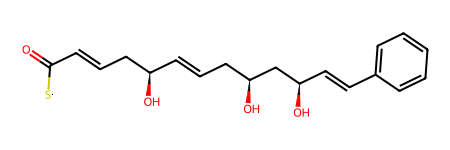

In [20]:
cluster = bcs.Cluster(modules = [loading_module, 
                                 module1,
                                 module2,
                                 module3,
                                 module4,
                                 module5])

cryptofolione = cluster.computeProduct(structureDB)
cryptofolione

Now, we have built the carbon scaffold for cryptofolione but this is still attached to the ACP domain of the final module and no offloading reaction has been performed yet to detach cryptofolione. As such, we will use `RDKit` to define two offloading reactions that may be catalyzed by the TE domain - a cyclization or thioesterase reaction.

In [21]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [22]:
def _pks_release_reaction(pks_release_mechanism: str, bound_product_mol: Chem.Mol) -> Chem.Mol:
    """
    Run a PKS offloading reaction to release a PKS product bound to its synthase via either a thiolysis or cyclization reaction
    """

    if pks_release_mechanism == 'thiolysis':
        Chem.SanitizeMol(bound_product_mol)  # run detachment reaction to produce terminal acid group
        rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[S:3]>>[C:1](=[O:2])[O].[S:3]')
        unbound_product_mol = rxn.RunReactants((bound_product_mol,))[0][0]
        Chem.SanitizeMol(unbound_product_mol)
        return unbound_product_mol

    if pks_release_mechanism == 'cyclization':
        Chem.SanitizeMol(bound_product_mol)  # run detachment reaction to cyclize bound substrate
        rxn = AllChem.ReactionFromSmarts('([C:1](=[O:2])[S:3].[O,N:4][C:5][C:6])>>[C:1](=[O:2])[*:4][C:5][C:6].[S:3]')
        try:
            unbound_product_mol = rxn.RunReactants((bound_product_mol,))[0][0]
            Chem.SanitizeMol(unbound_product_mol)
            return unbound_product_mol

        # if the bound substrate cannot be cyclized, then return None
        except:
            raise ValueError("\nUnable to perform cyclization reaction")

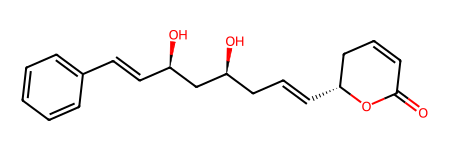

In [23]:
_pks_release_reaction('cyclization', cryptofolione)

#### More examples

#### Creating long, fully reduced alkanes

In [24]:
### Loading module with Malonyl-CoA
AT_domain_with_malonyl_CoA = bcs.AT(active = True, substrate = "Methylmalonyl-CoA")

loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_malonyl_CoA}, 
                            loading = True)

### First extension module with DH, ER, and KR domains
AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA") # Malonyl-CoA is used as an extension unit
KR_domain_mod1 = bcs.KR(active = True, type = "B")
DH_domain_mod1 = bcs.DH(active = True)
ER_domain_mod1 = bcs.ER(active = True)

module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1,
                                bcs.KR: KR_domain_mod1,
                                bcs.DH: DH_domain_mod1,
                                bcs.ER: ER_domain_mod1}, loading = False)

### Second extension module with DH, ER, and KR domains
AT_domain_mod2 = bcs.AT(active = True, substrate = "Malonyl-CoA") # Malonyl-CoA is used as an extension unit
KR_domain_mod2 = bcs.KR(active = True, type = "B")
DH_domain_mod2 = bcs.DH(active = True)
ER_domain_mod2 = bcs.ER(active = True)

module2 = bcs.Module(domains = {bcs.AT: AT_domain_mod2,
                                bcs.KR: KR_domain_mod2,
                                bcs.DH: DH_domain_mod2,
                                bcs.ER: ER_domain_mod2}, loading = False)

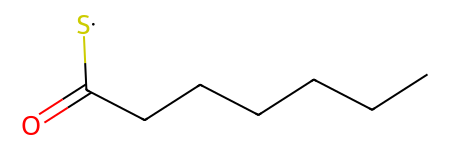

In [25]:
cluster = bcs.Cluster(modules = [loading_module, 
                                 module1,
                                 module2])

cluster.computeProduct(structureDB)

#### Creating the product of DEBS 1 from the erythromycin PKS

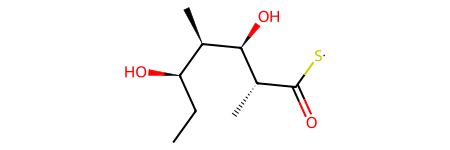

In [26]:
### Loading module with Propionyl-CoA
AT_domain_with_propionyl_CoA = bcs.AT(active = True, substrate = "prop")

loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_propionyl_CoA}, 
                            loading = True)

### First extension module with DH, and KR domains
AT_domain_mod1 = bcs.AT(active = True, substrate = "Methylmalonyl-CoA") 
KR_domain_mod1 = bcs.KR(active = True, type = "B1")

module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1,
                                bcs.KR: KR_domain_mod1}, loading = False)

### Second extension module with DH, and KR domains
AT_domain_mod2 = bcs.AT(active = True, substrate = "Methylmalonyl-CoA") 
KR_domain_mod2 = bcs.KR(active = True, type = "B1")

module2 = bcs.Module(domains = {bcs.AT: AT_domain_mod2,
                                bcs.KR: KR_domain_mod2}, loading = False)

cluster = bcs.Cluster(modules = [loading_module, 
                                 module1,
                                 module2])

product_mol = cluster.computeProduct(structureDB)
product_mol

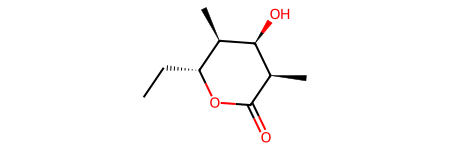

In [27]:
_pks_release_reaction(pks_release_mechanism = "cyclization", bound_product_mol = product_mol)